In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('D:/KULIAH/government-us-baby-names-by-state/BabyNamesState/babyNamesUS.csv')
df.head()

,StateCode,Sex,YearOfBirth,Name,Number
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


In [3]:
total_number = df.pivot_table('Number', index='YearOfBirth', columns='Sex', aggfunc=sum)
total_number


Sex,F,M
YearOfBirth,,
1910,352092,164229
1911,372376,193438
1912,504292,383702
1913,566967,461604
1914,696893,596439
...,...,...
2011,1423317,1657581
2012,1423211,1653198
2013,1421328,1649371


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot: xlabel='YearOfBirth'>

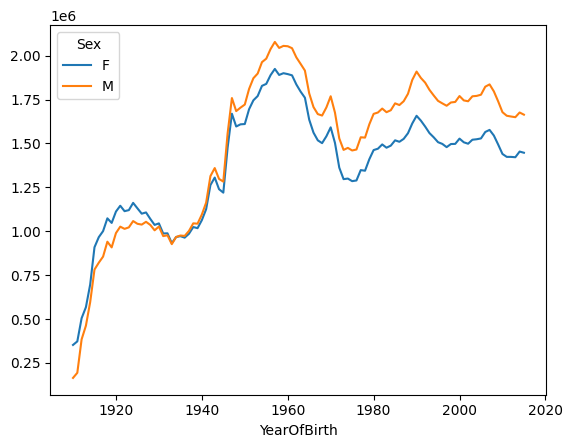

In [5]:
total_number.plot()

In [6]:
def add_prop(group):
    group['prop'] = group['YearOfBirth']/ group['YearOfBirth'].sum()
    return group

In [7]:
df = df.groupby(['YearOfBirth', 'Sex'], group_keys=False).apply(add_prop)

In [8]:
df.head()

,StateCode,Sex,YearOfBirth,Name,Number,prop
0,AK,F,1910,Mary,14,0.000094
1,AK,F,1910,Annie,12,0.000094
2,AK,F,1910,Anna,10,0.000094
3,AK,F,1910,Margaret,8,0.000094
4,AK,F,1910,Helen,7,0.000094


In [9]:
def get_1000(group):
    return group.sort_values(by='Number', ascending=False)[:1000]

In [10]:
grouped = df.groupby(['YearOfBirth', 'Sex']).apply(get_1000)

In [11]:
grouped.reset_index(inplace=True, drop=True)

In [12]:
grouped

,StateCode,Sex,YearOfBirth,Name,Number,prop
0,PA,F,1910,Mary,2913,0.000094
1,NY,F,1910,Mary,1923,0.000094
2,PA,F,1910,Helen,1604,0.000094
3,PA,F,1910,Anna,1534,0.000094
4,PA,F,1910,Margaret,1311,0.000094
...,...,...,...,...,...,...
211995,TX,M,2015,Edward,268,0.000023
211996,IL,M,2015,Levi,268,0.000023
211997,FL,M,2015,Tristan,267,0.000023
211998,OH,M,2015,Carson,267,0.000023
